In [ ]:
#En este proyecto voy a utilizar los datos meteorológicos de Madrid entre 1975 y 2015
#para crear una

In [2]:
# Asegúrate de tener el archivo en tu Colab. Puedes subirlo manualmente.
# Si ya lo tienes en la ruta correcta, salta esta celda.

# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar dataset
#Updated URL to point to the raw data
df = pd.read_csv("https://raw.githubusercontent.com/JPineiro13/ML-web-app-FLASK/main/data/Madrid_Daily_Weather_1997-2015.csv").iloc[:,0:]
pd.set_option("display.max_columns", None)
df.head()

# 3. Primeras filas y forma
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))

# 4. Columnas nulas
print("\nValores nulos por columna:")
print(df.isnull().sum())

# 5. Comprobar nombres de columnas
print("\nNombres de columnas:")
print(df.columns.tolist())

Primeras filas del dataset:
          CET  Max TemperatureC  Mean TemperatureC  Min TemperatureC  \
0  1997-01-01               7.0                4.0               2.0   
1  1997-01-02               7.0                3.0               0.0   
2  1997-01-03               5.0                3.0               2.0   
3  1997-01-04               7.0                3.0              -1.0   
4  1997-01-05               2.0                0.0              -1.0   

   Dew PointC  MeanDew PointC  Min DewpointC  Max Humidity   Mean Humidity  \
0         5.0             3.0            2.0         100.0            95.0   
1         6.0             3.0            0.0         100.0            92.0   
2         5.0             1.0           -1.0         100.0            85.0   
3        -2.0            -3.0           -4.0          86.0            63.0   
4         2.0             0.0           -3.0         100.0            95.0   

    Min Humidity   Max Sea Level PressurehPa   Mean Sea Level Pressure

In [9]:
#Como podemos ver, hay muchas columans con nulos. Realmente tampoco hay que implementar
#un modelo muy complejo, sino simplemente algo con lo que practicar con Flask

#En este caso me voy a quedar con las más completas y más relevantes: 'Max TemperatureC',
#'Mean TemperatureC','Min TemperatureC','Mean Humidity','Precipitationmm' y 'CloudCover'


In [3]:
# Si no lo hiciste antes
df.columns = df.columns.str.strip() #This line removes leading/trailing spaces from column names

# Convertir a datetime
df['CET'] = pd.to_datetime(df['CET'], errors='coerce') #Now, the column should be named 'CET'

# Crear columna de mes y estación
df['mes'] = df['CET'].dt.month

def asignar_estacion(mes):
    if mes in [12, 1, 2]:
        return 'invierno'
    elif mes in [3, 4, 5]:
        return 'primavera'
    elif mes in [6, 7, 8]:
        return 'verano'
    elif mes in [9, 10, 11]:
        return 'otoño'

df['estacion'] = df['mes'].apply(asignar_estacion)


In [4]:
print(df.columns.tolist())

['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC', 'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity', 'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa', 'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa', 'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM', 'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h', 'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees', 'mes', 'estacion']


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df['CET'] = pd.to_datetime(df['CET'], errors='coerce')

In [7]:
# Asegurate de que CET es datetime
df['CET'] = pd.to_datetime(df['CET'], errors='coerce')

# Crear una función que asigne estación
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'invierno'
    elif month in [3, 4, 5]:
        return 'primavera'
    elif month in [6, 7, 8]:
        return 'verano'
    else:
        return 'otoño'

df['season'] = df['CET'].apply(get_season)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Opcional: quitar espacios de columnas si aún no lo hiciste
df.columns = df.columns.str.strip()

# Elegimos las features numéricas más representativas (puedes ajustar)
features = [
    'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
    'Max Humidity', 'Mean Humidity', 'Min Humidity',
    'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h',
    'Precipitationmm'
]

# Quitar filas con valores faltantes solo en columnas seleccionadas
X = df[features]
y = df['season']

# Imputamos valores faltantes si hay
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [9]:
# Entrenar el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.69
              precision    recall  f1-score   support

    invierno       0.75      0.87      0.80       347
       otoño       0.56      0.43      0.49       356
   primavera       0.61      0.60      0.60       320
      verano       0.77      0.84      0.81       340

    accuracy                           0.69      1363
   macro avg       0.67      0.69      0.68      1363
weighted avg       0.67      0.69      0.68      1363



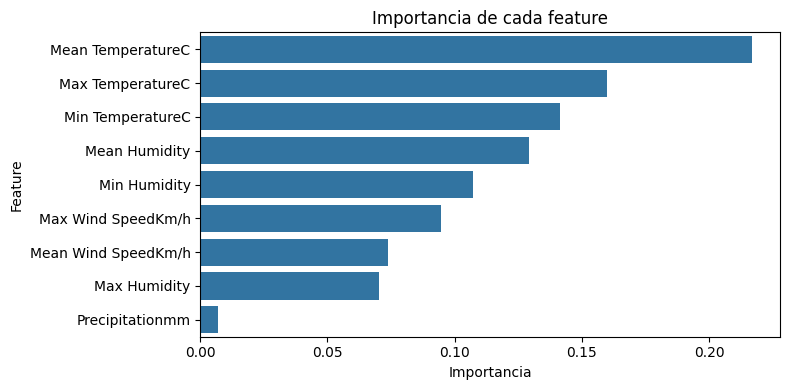

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = clf.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Importancia de cada feature")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Defino el grid de hiperparámetros a buscar (este proceso lo he repetido 3 veces
#hasta encontrar valores que se ajusten bien a lo que busco)
param_grid = {
    'n_estimators': [113, 125, 137],
    'max_depth': [None, 7, 10, 13],
    'min_samples_split': [11, 13, 15],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

#Creo el modelo base y configuro la búsqueda
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Ejecutar
grid_search.fit(X_train, y_train)

#Y saco los resultados
print(f"Mejor accuracy: {grid_search.best_score_:.2f}")
print("Mejores parámetros:")
print(grid_search.best_params_)
#Este último con el informe es muy util
print(classification_report(y_test, y_pred, target_names=best_rf.classes_))

#Como podemos ver, el modelo acierta la estación del año el 70% de las veces con los
#datos de un sólo día
#Puede parecer que no es gran cosa, pero hay que recordar un par de cosas:
#Estamos jugando con cuatro salidas posibles y no con dos, como en muchos de los
#problemas anteriores. Esto significa que si estimásemos la estación al azar, tendríamos
#un 75% de fallar, por lo que acertar un 70% de las veces es muy significativo
#Por otro lado, hay estaciones como otoño en las que nos podemos encontrar prácticamente
#cualquier temperatura por ser la estación más cambiante

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejor accuracy: 0.70
Mejores parámetros:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 137}
              precision    recall  f1-score   support

    invierno       0.75      0.90      0.82       347
       otoño       0.58      0.38      0.46       356
   primavera       0.62      0.63      0.63       320
      verano       0.76      0.87      0.81       340

    accuracy                           0.69      1363
   macro avg       0.68      0.70      0.68      1363
weighted avg       0.68      0.69      0.68      1363



In [ ]:
#Bien, ya tengo un modelo que acierta la estación del año en base a los datos de
#temperatura, humedad, viento y precipitaciones de un solo día.
#Ahora hay que implementarlo en Flask